CNN with MNIST data(Tensorflow)
===========

Import pakages
-----

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

import tensorflow as tf


c:\Users\user\.conda\envs\test\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\user\.conda\envs\test\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\user\.conda\envs\test\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Download datas
-----

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [3]:
print(mnist.data[0])
print(type(mnist.data[0]))

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [4]:
print(mnist.target[0])
print(type(mnist.target[0]))

5
<class 'str'>


Preprocess datas
----

In [5]:
mnist.target = mnist.target.astype(np.int8) # Target이 지금 'str'형으로 되어 있는데 이를 'int'형으로 바꿈


In [6]:
X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
target = mnist.target
y= np.zeros((len(target), 10))

In [7]:
id = np.eye(10)

for i in range(len(target)):
    y[i]= id[target[i]]

If we use a CNN model with Tensorflow, we need to change the shape of dataset as
$\left( N, H, W, C \right)$.

$N$ means the number of data.

$C$ means the number of channel.

$H$, $W$ mean the size of data.

In [8]:
X = np.reshape(X,(-1,28,28,1))

이 이미지 데이터의 레이블은 9이다


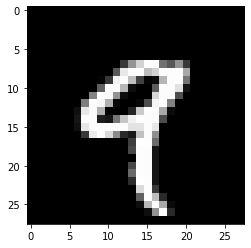

In [9]:
plt.imshow(X[4].reshape(28,28), cmap='gray')
ans = np.argmax(y[4])
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(ans))

In [10]:
X_train = X[0:60000]
X_test = X[60000:]
y_train = y[0:60000]
y_test = y[60000:]


Construct model
------



Pythorch provides a convolutional neural network layer through the command "tf.keras.layers.Conv2D".

Also, we need a (max/average) pooling layer during CNN model.

Pythorch provides a pooling layer through the command "tf.keras.layers.MaxPool2D", "tf.keras.layers.AveragePool2D".

tf.keras.layers.Conv2D
------
tf.keras.layers.Conv2D has 2 essential inputs (filters / kernel_size)

filters : the number of channels of output data

kernel_size : the size of kernel

Note. For the 1st convolution layer, we need to set input_shape

tf.keras.layers.Conv2D has other inessential inputs(strides / padding / dilation_rate / activation / use_bias etc.)

strides : the stride of the convolution - default = (1, 1)

padding : how method of padding('valid', 'same') - default = 'valid'

dilation : the dilation rate to use for dilated convolution - default = (1, 1)

activation : activation function to use - default = None

use_bias : whether adding a learnable bias to the output - default = True

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=3, padding='valid', input_shape = (28,28,1), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(32, kernel_size=5, padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(3,3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(10,activation='softmax'))

print(model.summary())

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 64)                1

예측 결과 : 9
이 이미지 데이터의 정답 레이블은 0입니다


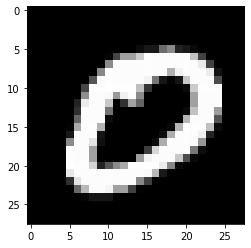

In [12]:
index = np.random.randint(10000)

data = X_test[index]
data = np.reshape(data,(-1,28,28,1))
output = model(data)  # 데이터를 입력하고 출력을 계산
pred = output.numpy()
pred = np.reshape(pred,(10))

print("예측 결과 : "+str(np.argmax(pred)))

plt.imshow(data.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(np.argmax(y_test[index])))

Before training
-----
We can test the model before training.

In [13]:
correct = 0
l = len(X_test)
for i in range(l):
    data = X_test[i]
    data = np.reshape(data,(-1,28,28,1))
    output = model(data)  # 데이터를 입력하고 출력을 계산
    pred = output.numpy()
    pred = np.reshape(pred,(10))
    pred = np.argmax(pred)
    if np.argmax(y_test[i]) == pred:
        correct = correct + 1

print("accuracy : " + str(correct/l))

accuracy : 0.1295


Training
-----

In [14]:
model.fit(X_train, y_train, epochs=5, shuffle=True)


Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1649
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0552
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0392
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0303
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0241


In [15]:
correct = 0
l = len(X_test)

for i in range(l):
    data = X_test[i]
    data = np.reshape(data,(-1,28,28,1))
    output = model(data)  # 데이터를 입력하고 출력을 계산
    pred = output.numpy()
    pred = np.reshape(pred,(10))
    pred = np.argmax(pred)
    if np.argmax(y_test[i]) == pred:
        correct = correct + 1

print("accuracy : " + str(correct/l))

accuracy : 0.9919


Check the model with data in testset
------

예측 결과 : 6
이 이미지 데이터의 정답 레이블은 6입니다


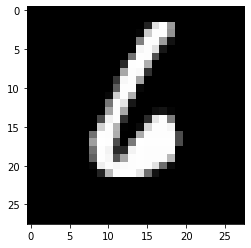

In [16]:
index = np.random.randint(10000)

data = X_test[index]
data = np.reshape(data,(-1,28,28,1))
output = model.predict(data)  # 데이터를 입력하고 출력을 계산
pred = np.reshape(output,(10))

print("예측 결과 : "+str(np.argmax(pred)))

plt.imshow(data.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(np.argmax(y_test[index])))



Check the model with custom image data
-----


In [17]:
from PIL import Image

img = Image.open('4.jpg').convert("L")
img = np.array(img)
img = img / 255.0
img = 1 - img
print(img)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.00392157 0.01176471 0.
  0.01176471 0.         0.00784314 0.00392157 0.         0.01568627
  0.         0.         0.00784314 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00784314 0.         0.         0.
  0.         0.01960784 0.         0.         0.         0.
  0.01960784 0.         0.         0.00784314 0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157 0.         0.         0.
  0.         0.         0.01176471 0.         0.         0.00392157
  0.         0.         0.01568627 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.01960784 0.0078431

예측 결과 : 4


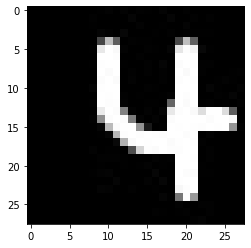

In [18]:
img = np.reshape(img,(-1,28,28,1))


output = model(img)  # 데이터를 입력하고 출력을 계산

pred = output.numpy()
pred = np.reshape(pred,(10))

print("예측 결과 : "+str(np.argmax(pred)))

plt.imshow(img.reshape(28, 28), cmap='gray')

In [19]:
out = model.predict(X_test)
print(type(out))
print(np.argmax(out,axis=1))

<class 'numpy.ndarray'>
[7 2 1 ... 4 5 6]


In [20]:
result = (np.argmax(out,axis=1) == np.argmax(y_test,axis=1))
print(np.count_nonzero(result)/len(result))

0.9919
